In [75]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.svm import SVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest

In [76]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Here  we note that age , cabin and embarked have some entries which are null, we should have to deal with this value

In [77]:
## See how data look like
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


PassangerId is just an index and I do not think name would matter to decide who survived and who not.

In [78]:
# Drop passengerId , Name and Ticket
df = df.drop('Name', 1)
df = df.drop('PassengerId', 1)
df = df.drop('Ticket', 1)
df = df.drop('Cabin', 1)

In [79]:
## look the data again
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Do Visualization to understand data better

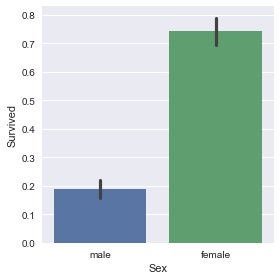

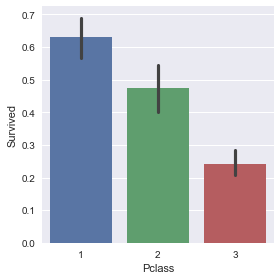

In [80]:
%matplotlib inline
sns.factorplot('Sex','Survived', data = df, kind = 'bar')
sns.factorplot('Pclass','Survived', data = df, kind = 'bar')

clearly Female have more chances of survival , also people having class 1 have more survival than any other class.

In [81]:
# People survived in the titanic
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

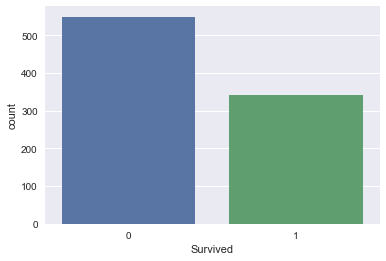

In [82]:
sns.countplot(df['Survived'])

In [83]:
#fill age with mean value
df = pd.get_dummies(df, prefix=['Sex', 'Embarked'])
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [84]:
def classification(x_train, y_train, x_test, y_test):
    """Read train/test data files."""
    for clf in classifiers:
        clf.fit(x_train, y_train)
        name = clf.__class__.__name__

        print("=" * 30)
        print(name)

        train_predictions = clf.predict(x_test)
        acc = accuracy_score(y_test, train_predictions)
        print("Accuracy: {:.4%}".format(acc))

        train_predictions = clf.predict_proba(x_test)
        ll = log_loss(y_test, train_predictions)
        print("Log Loss: {}".format(ll))

In [85]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [86]:
labels = df['Survived']
df = df.drop('Survived', 1)


In [87]:
sss = StratifiedShuffleSplit(labels, 10, test_size=0.2, random_state=23)
for train_index, test_index in sss:
        x_train, x_test = df.values[train_index], df.values[test_index]
        y_train, y_test = labels[train_index], labels[test_index]

# classification algorithm
classification(x_train, y_train, x_test, y_test)

KNeighborsClassifier
Accuracy: 73.1844%
Log Loss: 2.50134836463
SVC
Accuracy: 61.4525%
Log Loss: 0.548200266845
NuSVC
Accuracy: 73.7430%
Log Loss: 0.525703379148
DecisionTreeClassifier
Accuracy: 75.4190%
Log Loss: 8.31659562593
RandomForestClassifier
Accuracy: 79.3296%
Log Loss: 0.961728614899
AdaBoostClassifier
Accuracy: 79.8883%
Log Loss: 0.669215720443
GradientBoostingClassifier
Accuracy: 84.9162%
Log Loss: 0.389531899524
GaussianNB
Accuracy: 80.4469%
Log Loss: 0.768262512928
LinearDiscriminantAnalysis
Accuracy: 80.4469%
Log Loss: 0.446923856592
QuadraticDiscriminantAnalysis
Accuracy: 62.5698%
Log Loss: 10.4064823903


In [107]:
df.info()
favorite_clf = GradientBoostingClassifier()
favorite_clf.fit(x_train, y_train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.2 KB


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [108]:
test = pd.read_csv('test.csv')

# Drop passengerId , Name and Ticket
test = test.drop('Name', 1)
test = test.drop('PassengerId', 1)
test = test.drop('Ticket', 1)
test = test.drop('Cabin', 1)


In [109]:

#fill age with mean value
test = pd.get_dummies(test, prefix=['Sex', 'Embarked'])
test['Age'] = test['Age'].fillna(test['Age'].mean())
test['Fare'] = test['Fare'].fillna(test['Fare'].mean())
test.info()

test_predictions = favorite_clf.predict(test)
print test_predictions

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null int64
Age           418 non-null float64
SibSp         418 non-null int64
Parch         418 non-null int64
Fare          418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 18.4 KB
[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1

In [110]:
import numpy as np
# Format DataFrame
submission = pd.DataFrame(test_predictions, columns=['Survived'])
test = pd.read_csv('test.csv')
predictions = pd.concat((test.iloc[:, 0], submission), axis = 1)
predictions.to_csv('submission.csv', sep=",", index = False)